In [ ]:
!pip install -U seaborn

# Introducción a la visualización de datos con Matplotlib y Seaborn

Plan:

1. Uso básico (estilo Orientado a Objetos)
2. Catálogo de Gráficos
3. Visualización de datos estadísticos con Seaborn

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Uso básico de Matplotlib (estilo Orientado a Objetos)

Generación de datos de prueba.

Ejemplo, graficar $y_1(x) = x^2$, $y_2(x)= y_2(x) + \eta$.

In [2]:
x = np.linspace(0, 2, 100)
y1 = x**2
y2 = y1 + np.random.uniform(size=x.shape[0])

In [3]:
def my_plot(x,y1,y2):
    fig, axes = plt.subplots(2,1,figsize=(22,12)) 

    # Gráfico 1
    axes[0].set_title("Gráfico 1")
    axes[0].scatter(x, y1, label='y1',color="g")
    axes[0].plot(x, y2, label='y2')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].legend("Curva 1") 
    axes[0].grid(which='Both')
    axes[0].legend(["$y_1$","$y_2$"])
    
    # Gráfico 2
    axes[1].set_title("Gráfico 2")
    axes[1].scatter(x, -y1, label='y1',color="r")
    axes[1].plot(x, -y2, label='y2')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend("Curva 1") 
    axes[1].grid(which='Both')
    axes[1].legend(["-$y_1$","-$y_2$"])
    
    plt.show() # opcional

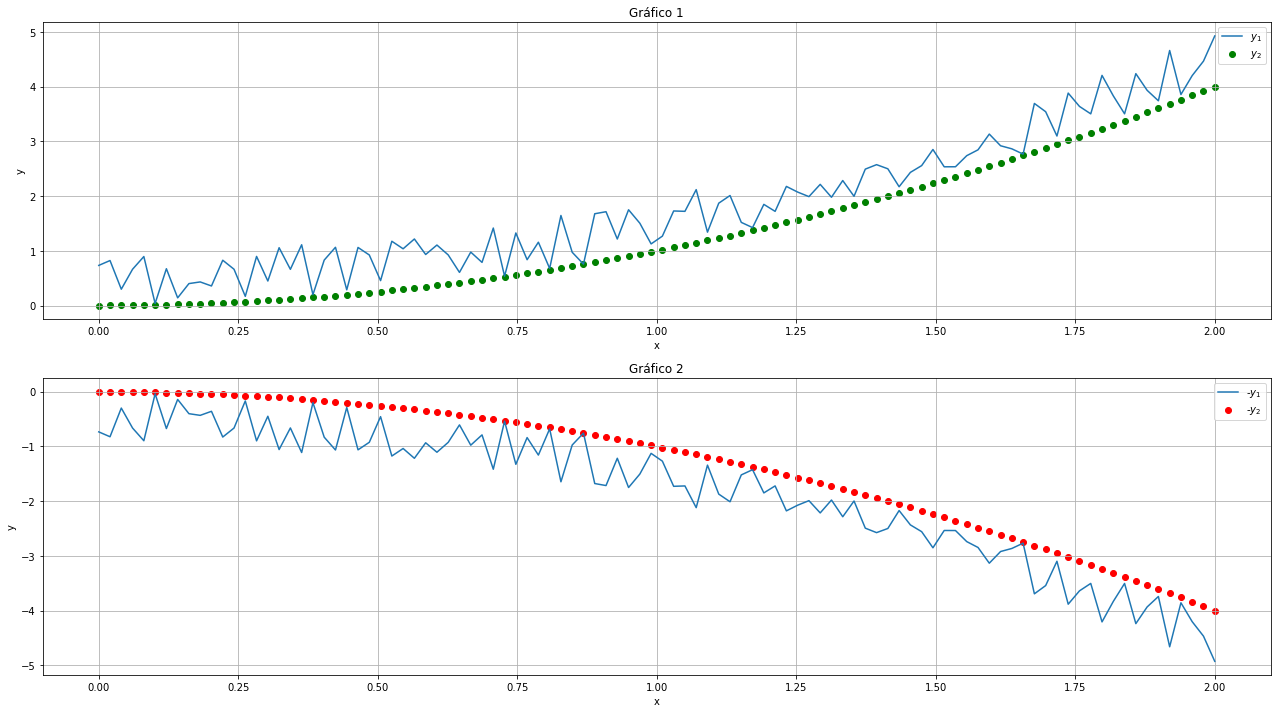

In [4]:
my_plot(x,y1,y2)

<center>
<img src="https://matplotlib.org/_images/anatomy.png"/>
</center>

Fuente: https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# 2. Visualización de datos estadísticos

- Uno de los primeros pasos (sino el primero) en el análisis de datos es la inspección visual. 
- La forma más sencilla es seleccionar alguno de los tipos de gráficos soportados por Matplotlib (ver: http://matplotlib.org/gallery.html) y copiar el código Python correspondiente.
- Para análisis de datos estadísticos, el paquete *seaborn*(http://www.stanford.edu/~mwaskom/software/seaborn/) provee una interface de más alto nivel sobre Matplotlib.
- Por último, Pandas también provee algunas funciones de alto nivel para visualización de datos.

In [19]:
import seaborn as sns
#sns.set()

In [6]:
import pandas as pd

In [7]:
from scipy import stats # para generar datos

### Datos Univariados

#### Histograma

- El histograma permite tener una impresión rápida de la distribución de los datos. 
- Si se divide por el total de muestras se obtiene un *histograma de frecuencia relativa* y si se conectan los puntos centrales de cada bin se obtiene un *polígono de frecuencia relativa*.

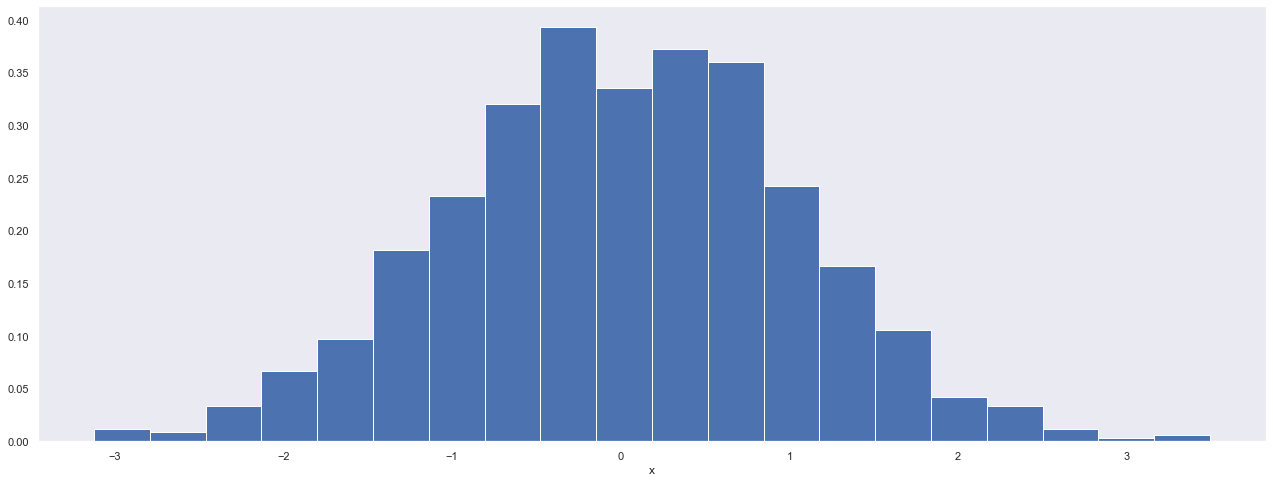

In [21]:
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.hist(stats.norm.rvs(size=1000), bins=20, density=True )
axes.set_xlabel('x')
axes.grid(which='Both')

#### Histograma con estimación de densidad de kernel (KDE)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


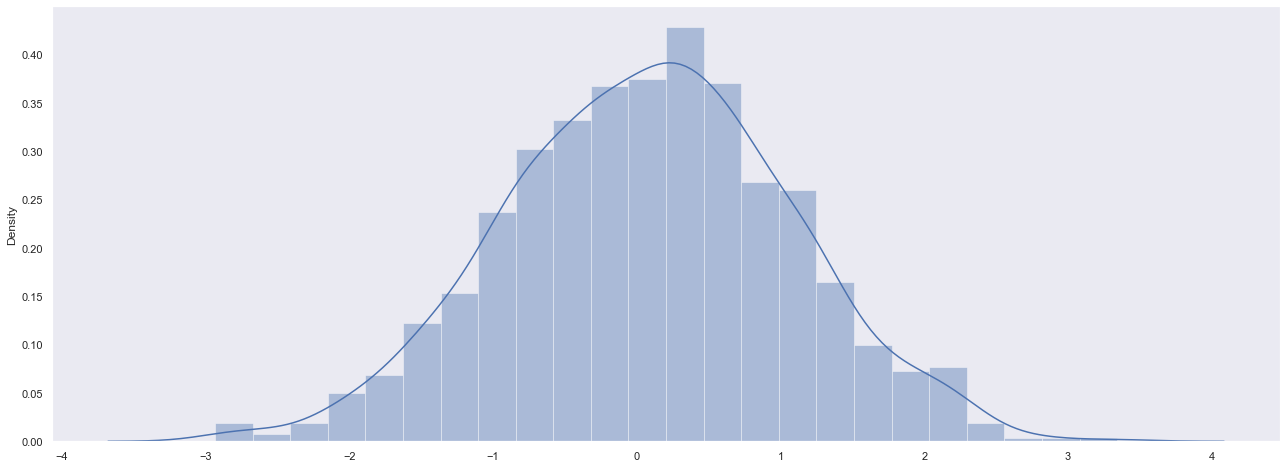

In [16]:
data = stats.norm.rvs(size=1000)
fig,axes = plt.subplots(1,1,figsize=(22,8))
sns.distplot(data,ax=axes,kde = True)
axes.grid(which='Both');

#### Cumulative frequencies

- La curva de frecuencia acumulada indica la cantidad (o porcentaje) de los datos cuyo valor es menor o igual a un valor dado. 
- Es útil para análisis estadístico, por ejemplo para conocer el rango que contiene el 95% de todos los valores. También es útil para comparar la distribución de valores de dos o más grupos.

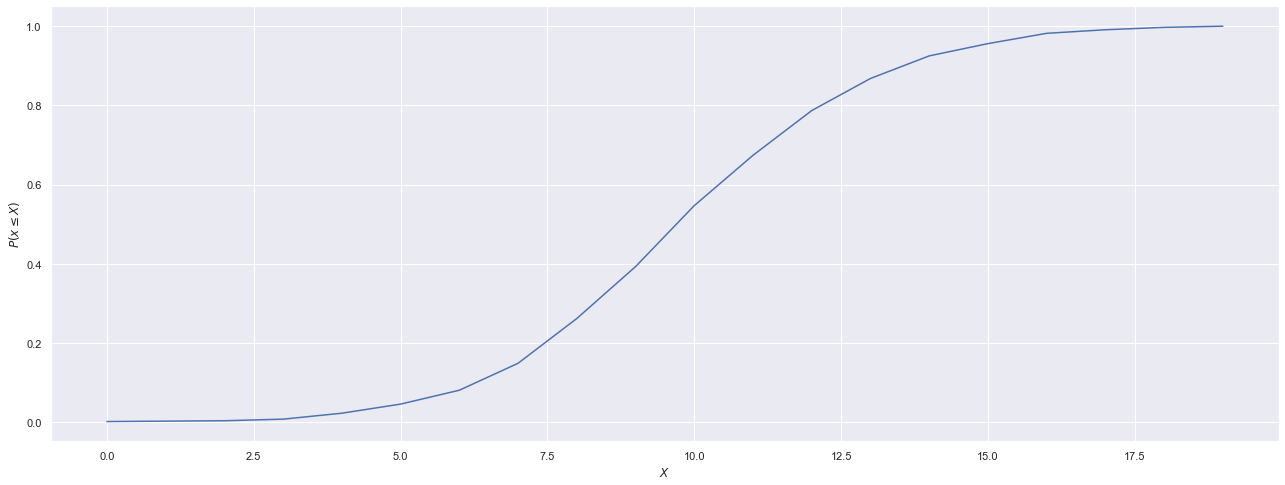

In [17]:
data = stats.norm.rvs(size=1000)
fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.plot(stats.cumfreq(data,numbins=20)[0]/1000);
axes.set_xlabel("$X$")
axes.set_ylabel("$P(x \leq X)$");

#### Barras de error

- Los gráficos de barras de error muestran el valor medio y la variabilidad de los datos. 
- **Importante**: se debe indicar de manera explícita si las barras de error corresponden a la desviación estandar o al error estándar de los datos. 
- En esto último caso hay un aspecto de interés: cuando las barras de error para los errores estándar de dos grupos se solapan, se puede asegurar que la diferencia entre sus medias no es estadísticamente significante (p> 0.05). No obstante, lo opuesto no siempre se cumple.

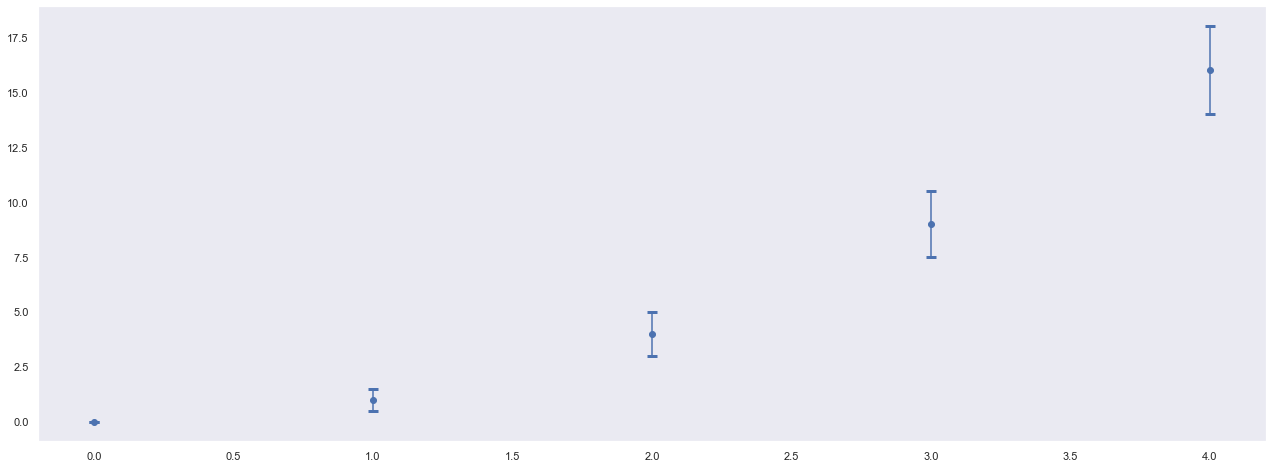

In [22]:
index = np.arange(5)
y = index**2
error_bar = index/2

fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.errorbar(index,y, yerr=error_bar, fmt='o',capsize=5, capthick=3)
axes.grid(which='Both')

#### Boxplot / Box & Whiskers (cajas y bigotes)

- En estos diagramas el lado inferior y superior de la caja indican el primer y tercer cuartil respectivamente. 
- La línea interior indica la **mediana**. 
- Se debe prestar atención a la convención utilizada, pues no hay una única manera de realizar estos diagramas. 
- La más usada es utilizar el "bigote" inferior para indicar el valor más bajo dentro del 1.5*rango-inter-cuartil(IQR) inferior y el bigote superior para indicar el valor más alto dentro de 1.5*rango-intercuartil superior. 
- Los valores anómalos (outliers) quedan afuera de los bigotes.

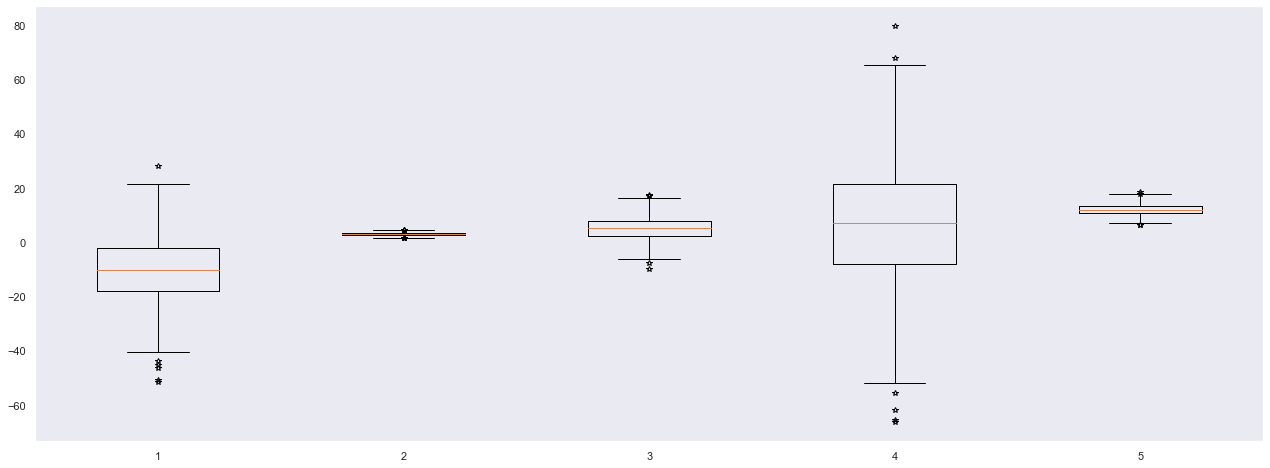

In [23]:
fig,axes = plt.subplots(1,1,figsize=(22,8))

data1 = stats.norm(loc = -10, scale = 12.5).rvs(size=1000)
data2 = stats.norm(loc = 3, scale = 0.5).rvs(size=1000)
data3 = stats.norm(loc = 5, scale = 4).rvs(size=1000)
data4 = stats.norm(loc = 6, scale = 21).rvs(size=1000)
data5 = stats.norm(loc = 12, scale = 2).rvs(size=1000)

axes.boxplot([data1,data2,data3,data4,data5],sym='*')
axes.grid(which='Both')

#### Gráficos de violín

- Los diagramas de cajas pueden combinarse con os diagramas KDE para generar los "Violin" plots, llamados así por su forma de violín. 
- El eje vertical es el mismo que en el diagrama de cajas, pero además se muestra un gráfico KDE en la dirección horizontal.

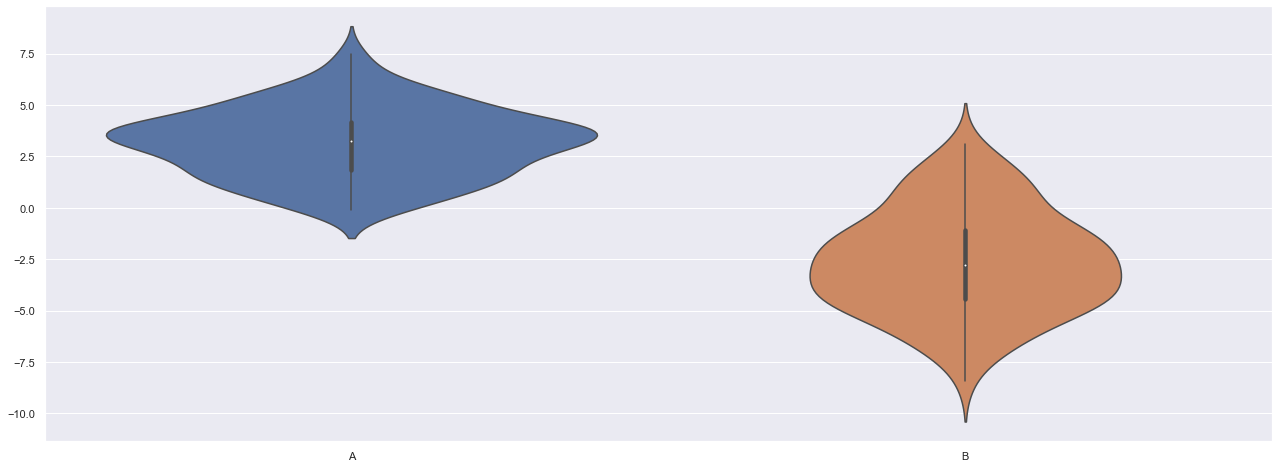

In [24]:
df = pd.DataFrame({
    'A':stats.norm(loc = 3, scale = 1.5).rvs(size=(100)), 
    'B':stats.norm(loc = -3, scale = 2.5).rvs(size=(100))
})

fig,axes = plt.subplots(1,1,figsize=(22,8))
sns.violinplot(data=df,ax=axes);

#### Gráficos de barra (Pandas)

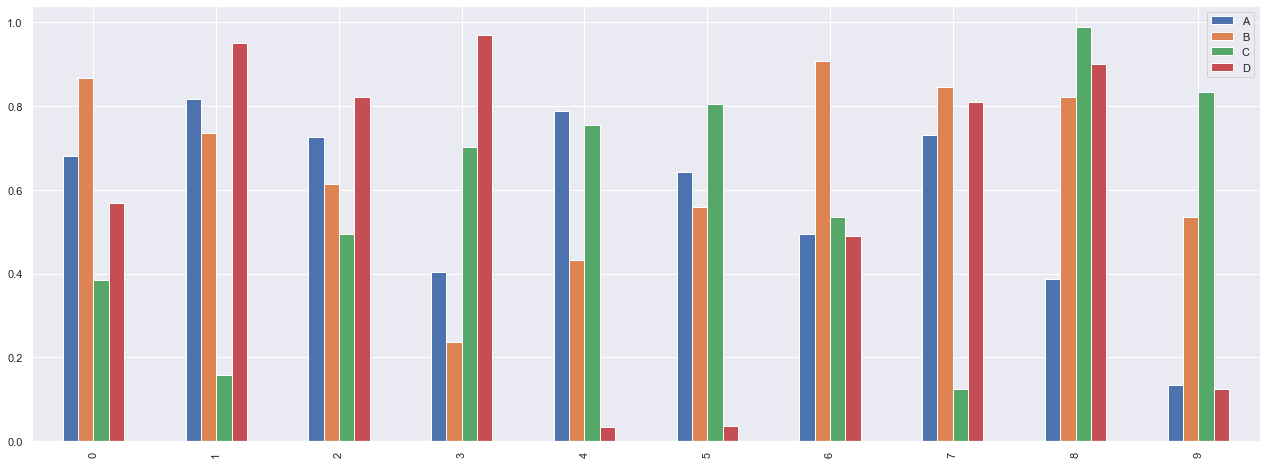

In [26]:
fig,axes = plt.subplots(1,1,figsize=(22,8))

df = pd.DataFrame(
    np.random.rand(10, 4),
    columns=['A', 'B', 'C', 'D']
)

df.plot(kind='bar',ax=axes);

#### Diagramas de torta (Pandas)

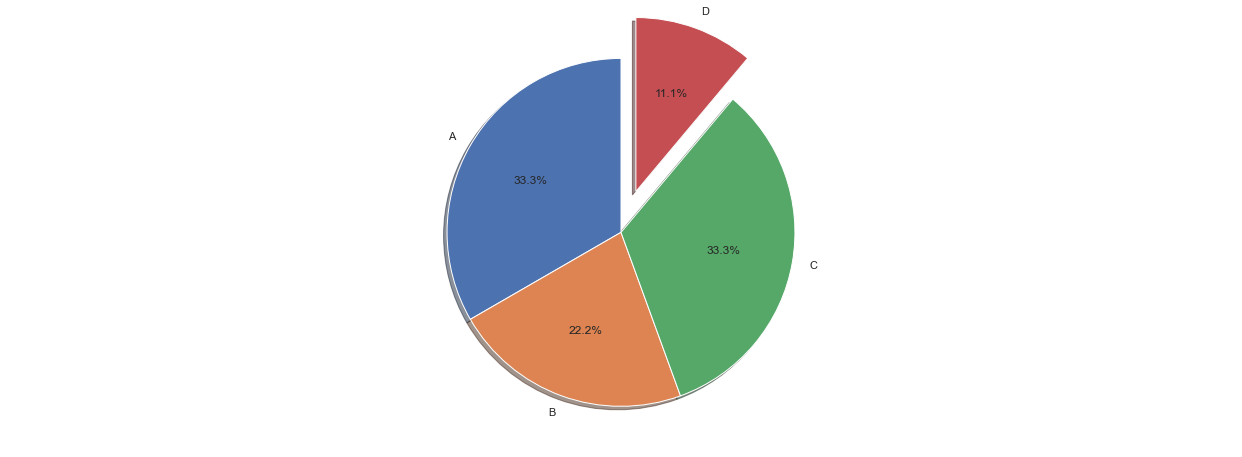

In [27]:
txtLabels = ['A', 'B', 'C', 'D']
fractions = [30, 20, 30, 10]
offsets =(0, 0, 0, 0.25)

fig,axes = plt.subplots(1,1,figsize=(22,8))
axes.axis('equal')
axes.pie(
    fractions, 
    explode=offsets, 
    labels=txtLabels,
    autopct='%1.1f%%', 
    shadow=True, startangle=90
);

### Datos bivariados y multivariados

#### Scatter

Para dos variables se puede utilizar ung gráfico X-Y.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


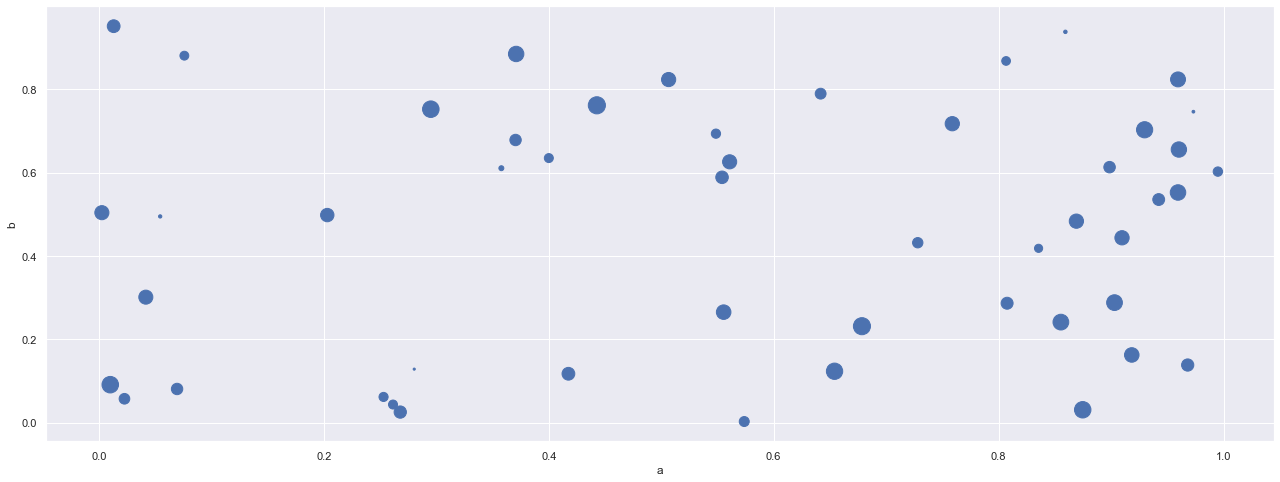

In [28]:
df = pd.DataFrame(
      np.random.rand(50, 4),
      columns=['a', 'b', 'c', 'd']
)

fig,axes = plt.subplots(1,1,figsize=(22,8))
df.plot(kind='scatter', x='a', y='b', s=df['c']*300.0,ax=axes);

#### Joint plot

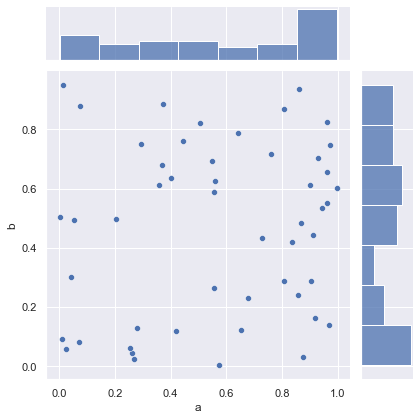

In [29]:
sns.jointplot(x='a',y='b',data=df);

Para más de tres variables que pueden estar relacionadas entre sí, puede ser útil usar la función *pairplot*.

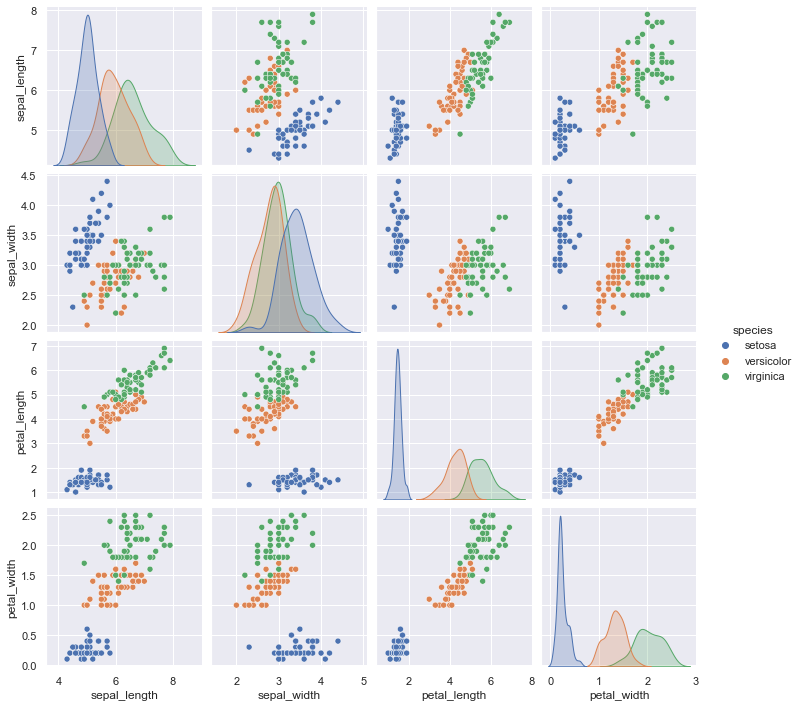

In [30]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", height=2.5);

#### Heatmap

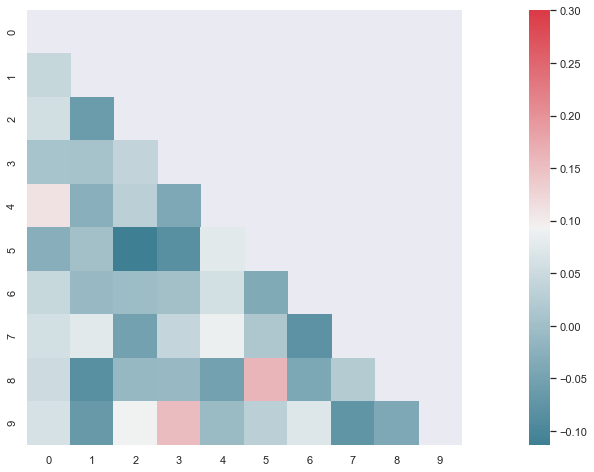

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)    

rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))
corr = np.corrcoef(np.random.randn(10, 200))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig,axes = plt.subplots(1,1,figsize=(24,8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True,ax=axes);

#### Pairplot

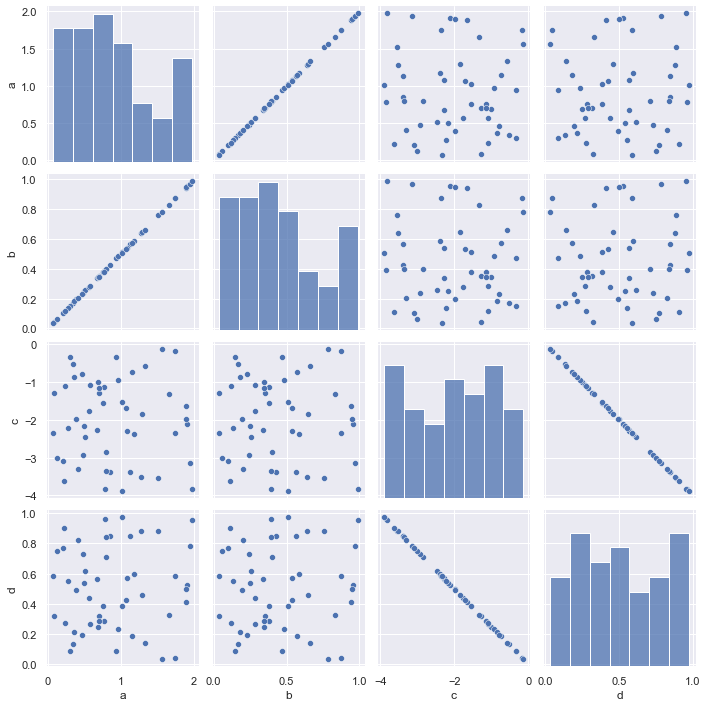

In [32]:
df = pd.DataFrame( np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'] )
df['a'] = 2.0*df['b']
df['c'] = -4.0*df['d']
sns.pairplot(data=df);

# Bibliografía y Referencias

- A Python Data Analyst's Toolkit
- An Introduction to Statistics with Python
- [Referencia Oficial de Matplotlib](https://matplotlib.org/)
- [Data Visualization using Matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70). Accedido 22/01/2020.
- [How to Read and Use a Box-and-Whisker Plot](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)
- [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html) Accedido: 11/01/2021.